# KI Kongress 2025
This is a mini example for the workshop "yourAI: Einführung in den HSBI-Rechencluster für KI-Anwendungen".
Please make sure to run this in the respective environment with keras and tensorflow installed.


In [8]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten

In [15]:
import tensorflow as tf
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


asdasd

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Rescale images to [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [10]:
network = Sequential([keras.Input(shape=(28, 28, 1)), 
                      Conv2D(32, (3, 3), activation="relu"),
                      MaxPooling2D((2, 2)),
                      Conv2D(64, (3, 3), activation="relu"),
                      MaxPooling2D((2, 2)),
                      Flatten(),
                      Dense(128, activation="relu"),
                      Dropout(0.5),
                      Dense(10, activation="softmax")])
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
network.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])
history = network.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
test_loss, test_acc = network.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9877 - loss: 0.0396 - val_accuracy: 0.9900 - val_loss: 0.0349
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9886 - loss: 0.0359 - val_accuracy: 0.9920 - val_loss: 0.0310
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9909 - loss: 0.0293 - val_accuracy: 0.9912 - val_loss: 0.0327
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9917 - val_loss: 0.0326
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9920 - loss: 0.0233 - val_accuracy: 0.9918 - val_loss: 0.0338
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9910 - loss: 0.0290
Test accuracy: 0.9932


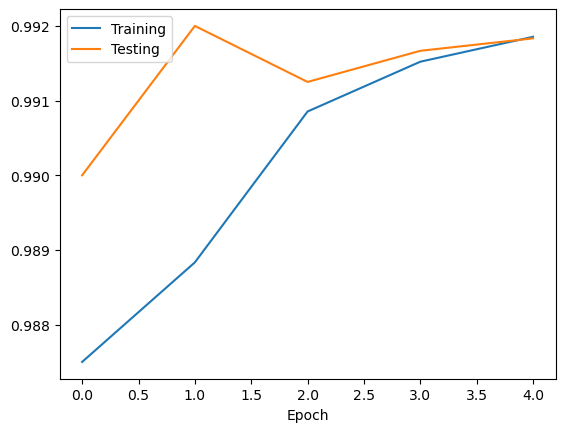

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend(["Training", "Testing"], loc="upper left")